# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [2]:
print(citipy)
print(output_data_file)

<module 'citipy.citipy' from 'C:\\Users\\shawn\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>
output_data/cities.csv


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [4]:
response = requests.get(query_url + city.replace(" ","&")).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": -17.9333,
        "lon": 19.7667
    },
    "dt": 1652652514,
    "id": 3353383,
    "main": {
        "feels_like": 63.05,
        "grnd_level": 896,
        "humidity": 39,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 65.01,
        "temp_max": 65.01,
        "temp_min": 65.01
    },
    "name": "Rundu",
    "sys": {
        "country": "NA",
        "sunrise": 1652677163,
        "sunset": 1652717724
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 87,
        "gust": 9.31,
        "speed": 5.48
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
count_1 = 0
count_2 = 1

lat = []
lng = []
cloudinesses = []
countries = []
humidities = []
temp_max = []
wind_speed = []
dates = []
cityname = []

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])

        if count_1 > 48:
            count_1 = 1
            count_2 += 1
            cityname.append(city)
        else:
            count_1 += 1
            cityname.append(city)
        print(f"Processing Record {count_1} of Set {count_2} | {city}")
    except Exception:
        print("Cant find city. Skipping...")
print("-----------------------------")
print("Data Retrieval is Complete")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | avarua
Cant find city. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | donghai
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | kapaa
Cant find city. Skipping...
Cant find city. Skipping...
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | mlonggo
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | allende
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | elizabeth city
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 

Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | jamnagar
Cant find city. Skipping...
Processing Record 43 of Set 4 | lipin bor
Processing Record 44 of Set 4 | jaisalmer
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | ust-barguzin
Processing Record 48 of Set 4 | vanimo
Processing Record 49 of Set 4 | pangnirtung
Cant find city. Skipping...
Processing Record 1 of Set 5 | ciucea
Processing Record 2 of Set 5 | alta floresta
Processing Record 3 of Set 5 | paralimni
Processing Record 4 of Set 5 | anadyr
Processing Record 5 of Set 5 | soubre
Processing Record 6 of Set 5 | antofagasta
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | pastavy
Processing Record 9 of Set 5 | songjianghe
Processing Record 10 of Set 5 | beloha
Processing Record 11 of Set 5 | lubango
Processing Record 12 of Set 5 | hami
Processing Record 13 of Set 5 | wattegama
Processing Record 14 of Set 5 | suez
Process

Processing Record 27 of Set 8 | baijiantan
Processing Record 28 of Set 8 | gagino
Processing Record 29 of Set 8 | san-pedro
Cant find city. Skipping...
Processing Record 30 of Set 8 | oistins
Processing Record 31 of Set 8 | cairo
Cant find city. Skipping...
Processing Record 32 of Set 8 | limuru
Processing Record 33 of Set 8 | promyshlennovskiy
Processing Record 34 of Set 8 | borogontsy
Processing Record 35 of Set 8 | macas
Processing Record 36 of Set 8 | coro
Processing Record 37 of Set 8 | kropotkin
Cant find city. Skipping...
Processing Record 38 of Set 8 | menongue
Processing Record 39 of Set 8 | inongo
Processing Record 40 of Set 8 | olinda
Cant find city. Skipping...
Processing Record 41 of Set 8 | esperance
Cant find city. Skipping...
Processing Record 42 of Set 8 | mayumba
Processing Record 43 of Set 8 | watertown
Processing Record 44 of Set 8 | bonthe
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | saint-joseph
Processing Record 47 of Set 8 | sorland


Processing Record 15 of Set 12 | amberley
Processing Record 16 of Set 12 | tura
Processing Record 17 of Set 12 | rundu
-----------------------------
Data Retrieval is Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = {"City":cityname, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, "Humidity":humidities, 
               "Lat":lat, "Lng":lng, "Max Temp":temp_max, "Wind Speed":wind_speed}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.loc[weather_df["Humidity"] <= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,40,AU,1652652514,82,-42.8794,147.3294,48.06,11.50
1,vardo,100,NO,1652652515,81,70.3705,31.1107,37.38,9.22
2,avarua,75,CK,1652652516,61,-21.2078,-159.7750,82.45,4.61
3,albany,30,US,1652652458,91,42.6001,-73.9662,73.51,4.83
4,donghai,100,CN,1652652516,92,22.9459,115.6420,65.32,5.46
...,...,...,...,...,...,...,...,...,...
551,tiarei,65,PF,1652652746,75,-17.5333,-149.3333,84.22,14.23
552,manggar,42,ID,1652652746,83,-2.8833,108.2667,81.28,6.91
553,amberley,0,US,1652652746,34,39.2048,-84.4280,86.32,5.75
554,tura,99,IN,1652652747,98,25.5198,90.2201,72.90,5.84


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers = weather_df.loc[weather_df["Humidity"] > 100]
humidity_outliers
#100% humidity does not exist



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
clean_city_data = weather_df.drop(humidity_outliers["Humidity"], inplace= False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,40,AU,1652652514,82,-42.8794,147.3294,48.06,11.50
1,vardo,100,NO,1652652515,81,70.3705,31.1107,37.38,9.22
2,avarua,75,CK,1652652516,61,-21.2078,-159.7750,82.45,4.61
3,albany,30,US,1652652458,91,42.6001,-73.9662,73.51,4.83
4,donghai,100,CN,1652652516,92,22.9459,115.6420,65.32,5.46


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

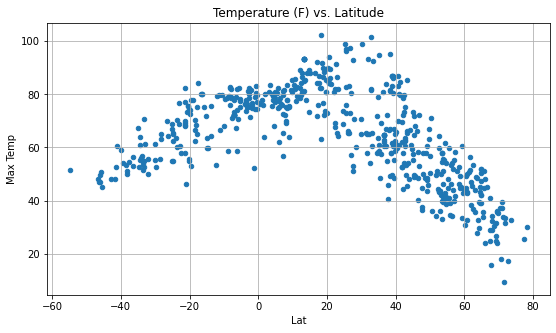

In [11]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(9,5),
                     title="Temperature (F) vs. Latitude")
plt.show()

In [12]:
#We are shown the correlation between the max temprature in the cities and latitude. As the latitudes get closer to 
#the 0-20 range the temps increase but towards the more extreem latitudes the max temps drop 

## Latitude vs. Humidity Plot

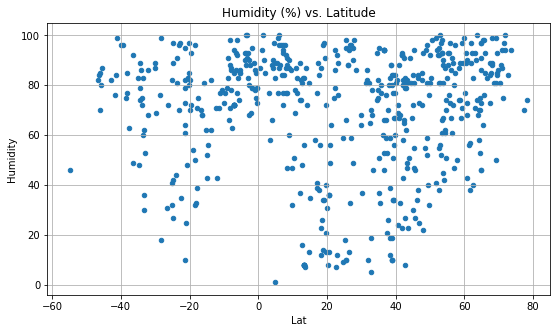

In [13]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(9,5),
              title="Humidity (%) vs. Latitude")
plt.show()

In [14]:
#This chart shows the correlation between humidity and latitude. There seems to be a very sporadic correlation

## Latitude vs. Cloudiness Plot

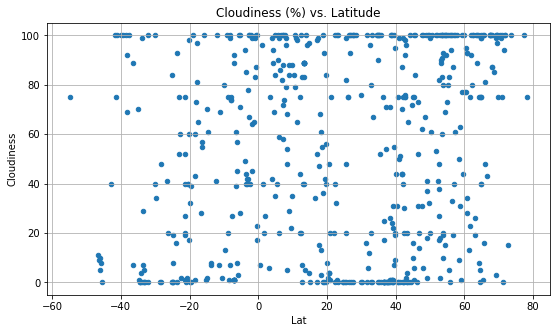

In [15]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(9,5),
              title="Cloudiness (%) vs. Latitude")
plt.show()

In [ ]:
#The correltion between cloudiness and latitude is more focused around 0 and 100 but is sporadic in between 

## Latitude vs. Wind Speed Plot

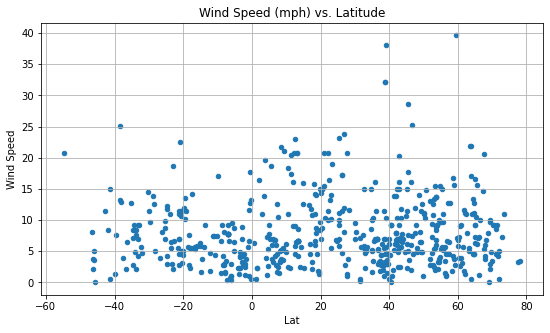

In [16]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(9,5),
              title="Wind Speed (mph) vs. Latitude")
plt.show()

In [ ]:
#The correlation between latitude and windspeed seems to be more focused in the higher latitudes 

## Linear Regression

In [17]:
north_hemi_df = clean_city_data.loc[clean_city_data["Lat"] > 0]
south_hemi_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.649251961074829


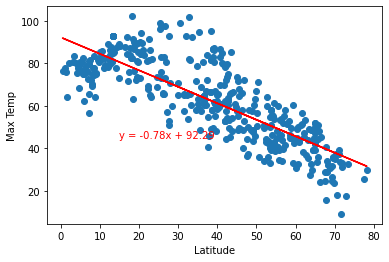

In [19]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [20]:
#There is a negative relationship between temp and latitude 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6006237543673291


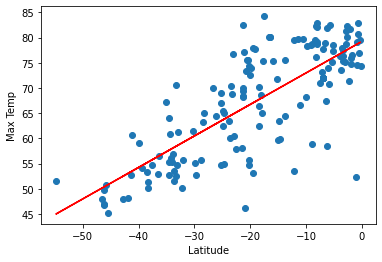

In [21]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a positive relationship between temp and latitude 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.03664569838413677


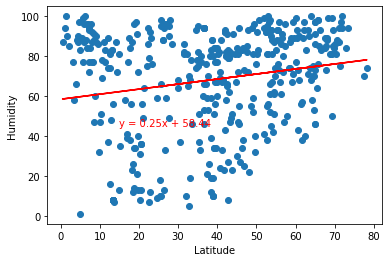

In [23]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a very weak positive correlation between latitude and humidity in the north hemisphere 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.03155865297876454


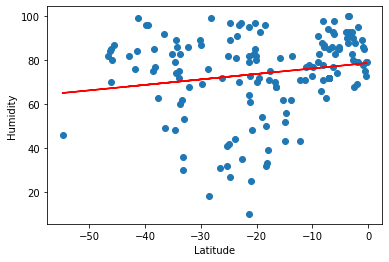

In [24]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a very weak positive correlation between latitude and humidity in the south hemisphere 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.011246452895617523


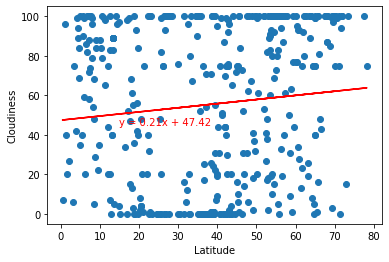

In [25]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a very weak positive correlation between latitude and humidity in the north hemisphere 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03005599917102961


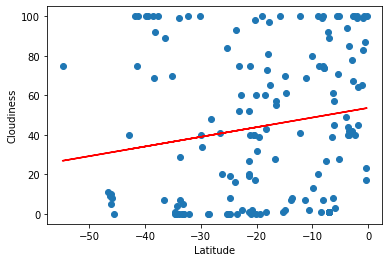

In [26]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a very weak positive correlation between latitude and humidity in the south hemisphere 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0029437222527283306


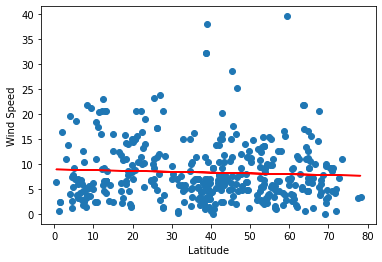

In [27]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a very weak negative correlation between latitude and humidity in the north hemisphere 
#The data is more clustered in the lower wind speeds

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.05585426010289836


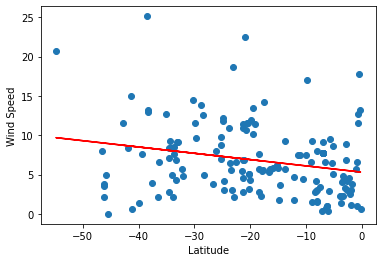

In [28]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

In [ ]:
#There is a negative correlation between latitude and humidity in the south hemisphere 
#The data is more clustered in the more positive latitudes 